In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_uber = _dntk.execute_sql(
  'SELECT *\nFROM \'ds_challenge_v2_1_data.csv\'',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_uber

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NA,NA,None,None,NA,NA
1,2,Strark,windows,Paid,2016-01-21,NA,NA,None,None,NA,NA
2,3,Wrouver,windows,Organic,2016-01-11,1/11/16,NA,None,None,NA,NA
3,4,Berton,android web,Referral,2016-01-29,2/3/16,2/3/16,Toyota,Corolla,2016,2/3/16
4,5,Strark,android web,Referral,2016-01-10,1/25/16,1/26/16,Hyundai,Sonata,2016,NA
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,2016-01-15,NA,NA,None,None,NA,NA
54677,54678,Strark,other,Paid,2016-01-21,NA,NA,None,None,NA,NA
54678,54679,Strark,ios web,Organic,2016-01-06,NA,NA,None,None,NA,NA
54679,54680,Berton,android web,Paid,2016-01-18,NA,NA,None,None,NA,NA


In [3]:
df_uber.describe(include='all')

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
count,54681.000000,54681,47824,54681,54681,54681,54681,13223,13223,54681,54681
unique,NaN,3,5,3,NaN,75,79,46,368,25,58
top,NaN,Strark,ios web,Paid,NaN,NA,NA,Toyota,Civic,NA,NA
freq,NaN,29557,16632,23938,NaN,21785,41547,3219,689,41458,48544
mean,27341.000000,NaN,NaN,NaN,2016-01-14 20:14:48.791353,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,13671.000000,NaN,NaN,NaN,2016-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,27341.000000,NaN,NaN,NaN,2016-01-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,41011.000000,NaN,NaN,NaN,2016-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,54681.000000,NaN,NaN,NaN,2016-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    54681 non-null  int64         
 1   city_name             54681 non-null  object        
 2   signup_os             47824 non-null  object        
 3   signup_channel        54681 non-null  object        
 4   signup_date           54681 non-null  datetime64[us]
 5   bgc_date              54681 non-null  object        
 6   vehicle_added_date    54681 non-null  object        
 7   vehicle_make          13223 non-null  object        
 8   vehicle_model         13223 non-null  object        
 9   vehicle_year          54681 non-null  object        
 10  first_completed_date  54681 non-null  object        
dtypes: datetime64[us](1), int64(1), object(9)
memory usage: 4.6+ MB


> Analyze the structure and basic statistics of the Uber dataset to understand its key characteristics.

In [5]:
# Let's analyze the data more comprehensively

# 1. Check unique values and their counts for categorical columns
categorical_cols = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_uber[col].value_counts())
    print(f"Null values: {df_uber[col].isnull().sum()}")


Unique values in city_name:
city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64
Null values: 0

Unique values in signup_os:
signup_os
ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: count, dtype: int64
Null values: 6857

Unique values in signup_channel:
signup_channel
Paid        23938
Referral    17316
Organic     13427
Name: count, dtype: int64
Null values: 0

Unique values in vehicle_make:
vehicle_make
Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac

In [6]:
# 2. Convert date columns to datetime and analyze the date ranges
date_cols = ['bgc_date', 'vehicle_added_date', 'first_completed_date']

for col in date_cols:
    df_uber[col] = pd.to_datetime(df_uber[col], errors='coerce')

print("\nDate ranges for all date columns:")
for col in ['signup_date'] + date_cols:
    print(f"\n{col}:")
    print(f"Min date: {df_uber[col].min()}")
    print(f"Max date: {df_uber[col].max()}")
    print(f"Null values: {df_uber[col].isnull().sum()}")


Date ranges for all date columns:

signup_date:
Min date: 2016-01-01 00:00:00
Max date: 2016-01-30 00:00:00
Null values: 0

bgc_date:
Min date: 2016-01-01 00:00:00
Max date: 2016-03-25 00:00:00
Null values: 21785

vehicle_added_date:
Min date: 2016-01-01 00:00:00
Max date: 2016-03-26 00:00:00
Null values: 41547

first_completed_date:
Min date: 2016-01-04 00:00:00
Max date: 2016-02-29 00:00:00
Null values: 48544
/tmp/ipykernel_75/1851432061.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uber[col] = pd.to_datetime(df_uber[col], errors='coerce')
/tmp/ipykernel_75/1851432061.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uber[col] = pd.to_datetime(df_uber[col], errors='coerce')
/tmp/ipykernel_75/18

In [7]:
# 3. Calculate key metrics
total_signups = len(df_uber)
completed_trips = df_uber['first_completed_date'].notna().sum()
vehicles_added = df_uber['vehicle_make'].notna().sum()
bgc_completed = df_uber['bgc_date'].notna().sum()

print(f"Total signups: {total_signups}")
print(f"Number of drivers who completed trips: {completed_trips} ({completed_trips/total_signups*100:.1f}%)")
print(f"Number of vehicles added: {vehicles_added} ({vehicles_added/total_signups*100:.1f}%)")
print(f"Number of completed background checks: {bgc_completed} ({bgc_completed/total_signups*100:.1f}%)")

# Calculate signup distribution by city and channel
signup_distribution = pd.crosstab(df_uber['city_name'], df_uber['signup_channel'], normalize='index') * 100
print("\nSignup channel distribution by city (%):")
print(signup_distribution)

Total signups: 54681
Number of drivers who completed trips: 6137 (11.2%)
Number of vehicles added: 13223 (24.2%)
Number of completed background checks: 32896 (60.2%)

Signup channel distribution by city (%):
signup_channel    Organic       Paid   Referral
city_name                                      
Berton          24.064224  43.450813  32.484963
Strark          24.640525  41.976520  33.382955
Wrouver         26.023567  55.721989  18.254444


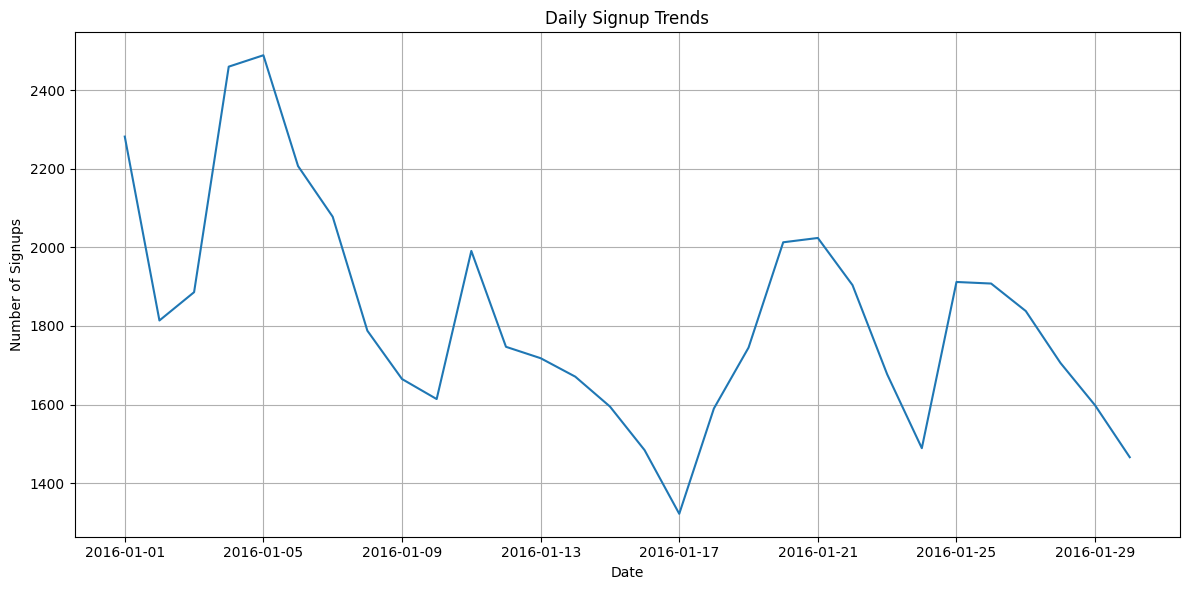

In [8]:
# 4. Visualize daily signup trends
plt.figure(figsize=(12, 6))
df_uber['signup_date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Daily Signup Trends')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.tight_layout()
# shows a tread of signups over time, but need to look into more charts and values
# 

Based on the analysis, here are the key characteristics of the Uber dataset:

1. Data Volume and Cities:
- Total of 54,681 signups across 3 cities (Strark: 29,557, Berton: 20,117, Wrouver: 5,007)
- Data spans January 2016 (signups from Jan 1 to Jan 30)

2. Signup Channels and Platforms:
- Three signup channels: Paid (43.8%), Referral (31.7%), Organic (24.5%)
- Major platforms: iOS web (34.8%), Android web (31.2%), Windows (14.2%)
- 6,857 missing platform entries (12.5%)

3. Driver Funnel:
- Only 11.2% of signups completed their first trip
- 24.2% added vehicles to their accounts
- 60.2% completed background checks

4. Vehicle Information:
- Toyota, Honda, and Nissan are the most common vehicle makes
- Popular models include Civic, Corolla, and Camry
- Significant missing vehicle data (75.8% of records)

5. Timeline Characteristics:
- Background checks extend to March 25, 2016
- Vehicle additions continue until March 26, 2016
- First completed trips recorded until February 29, 2016

The data suggests a significant drop-off rate in the driver funnel, with only a small percentage of initial signups proceeding to complete trips.

In [9]:
# lets look into cleaning and preprocessing
# what are the missing values in the dataset NAN


> Look into the NAN values of each column to understand what columns hold more/less data. What are the correlations of each column with missing information? What might be a cofactor of missing values? (HG: Are new drivers with no added vehicle working as an Uber? Do they own or share a vehicle? Maybe we should look into predicting the model of drivers with no vehicle when completed their first run)

In [10]:

# Check missing values in each column
print("Number of missing values in each column:")
print(df_uber.isnull().sum())

# Check 'NA' string values which are actually missing values
print("\nNumber of 'NA' string values in each column:")
na_counts = {}
for column in df_uber.columns:
    if df_uber[column].dtype == 'object':
        na_counts[column] = (df_uber[column] == 'NA').sum()
print(pd.Series(na_counts))

# Calculate percentage of missing values
print("\nPercentage of missing values (including 'NA' strings):")
total_rows = len(df_uber)
missing_percentages = {}
for column in df_uber.columns:
    if df_uber[column].dtype == 'object':
        missing = df_uber[column].isnull().sum() + (df_uber[column] == 'NA').sum()
    else:
        missing = df_uber[column].isnull().sum()
    percentage = (missing / total_rows) * 100
    missing_percentages[column] = percentage
print(pd.Series(missing_percentages))

# Analysis of patterns in missing data
print("\nAnalysis of missing data patterns:")
print("\n1. signup_os missing values by city:")
print(df_uber[df_uber['signup_os'].isnull()]['city_name'].value_counts())

print("\n2. Vehicle information pattern:")
vehicle_info = df_uber[['vehicle_make', 'vehicle_model', 'vehicle_year']]
print("Number of rows where all vehicle information is missing:")
print(vehicle_info[vehicle_info.isnull().all(axis=1) | 
                  ((vehicle_info == 'NA').all(axis=1))].shape[0])

# Convert date columns to datetime
date_columns = ['bgc_date', 'vehicle_added_date', 'first_completed_date']
for col in date_columns:
    df_uber[col] = pd.to_datetime(df_uber[col], errors='coerce')

# Analyze temporal patterns of missing data
print("\n3. Timeline analysis:")
print("First signup date:", df_uber['signup_date'].min())
print("Last signup date:", df_uber['signup_date'].max())

Number of missing values in each column:
id                          0
city_name                   0
signup_os                6857
signup_channel              0
signup_date                 0
bgc_date                21785
vehicle_added_date      41547
vehicle_make            41458
vehicle_model           41458
vehicle_year                0
first_completed_date    48544
dtype: int64

Number of 'NA' string values in each column:
city_name             0
signup_os             0
signup_channel        0
vehicle_make          0
vehicle_model         0
vehicle_year      41458
dtype: int64

Percentage of missing values (including 'NA' strings):
id                       0.000000
city_name                0.000000
signup_os               12.540005
signup_channel           0.000000
signup_date              0.000000
bgc_date                39.840164
vehicle_added_date      75.980688
vehicle_make            75.817926
vehicle_model           75.817926
vehicle_year            75.817926
first_completed_d

In [11]:
# Calculate and display the number and percentage of NaN values for each column
nan_analysis = pd.DataFrame({
    'NaN Count': df_uber.isna().sum(),
    'NaN Percentage': (df_uber.isna().sum() / len(df_uber) * 100).round(2)
}).sort_values('NaN Percentage', ascending=False)

print("NaN Analysis of Uber Dataset:")
print("\nTotal number of rows:", len(df_uber))
print("\nNaN Statistics:")
print(nan_analysis)

NaN Analysis of Uber Dataset:

Total number of rows: 54681

NaN Statistics:
                      NaN Count  NaN Percentage
first_completed_date      48544           88.78
vehicle_added_date        41547           75.98
vehicle_make              41458           75.82
vehicle_model             41458           75.82
bgc_date                  21785           39.84
signup_os                  6857           12.54
id                            0            0.00
city_name                     0            0.00
signup_channel                0            0.00
signup_date                   0            0.00
vehicle_year                  0            0.00


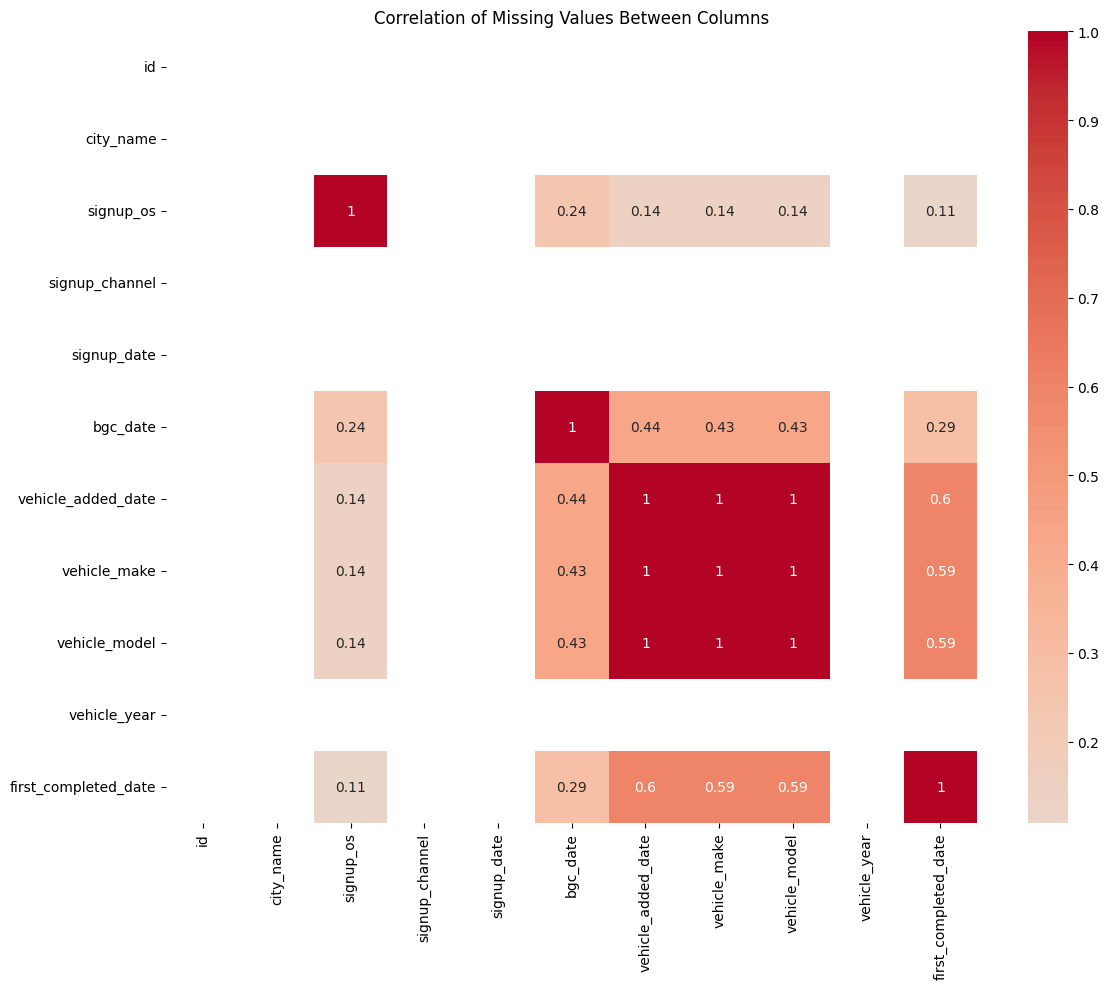

In [12]:
# Let's analyze the relationship between these missing values
# Create a correlation matrix of null values
null_matrix = df_uber.isnull().astype(int)
null_corr = null_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(null_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Missing Values Between Columns')
plt.tight_layout()

The NaN analysis reveals a clear pattern in the data that reflects the driver onboarding funnel:

1. Basic Information (0% NaN):
- id, city_name, signup_channel, signup_date, vehicle_year have no missing values
- These are likely required fields during initial signup

2. Device Information (12.54% NaN):
- signup_os has relatively few missing values
- This might be due to some signups occurring through unidentified platforms or technical issues

3. Background Check (39.84% NaN):
- bgc_date is missing for about 40% of signups
- This suggests that many potential drivers don't proceed past the initial application

4. Vehicle Information (75.8-76% NaN):
- vehicle_make, vehicle_model, and vehicle_added_date have similar missing percentages
- This indicates that about 24% of signups reach the vehicle addition stage
- The high correlation between these nulls suggests they're filled together during vehicle registration

5. Completed Trips (88.78% NaN):
- first_completed_date has the highest percentage of missing values
- This shows that only about 11% of signups complete their first trip

This pattern shows a clear funnel where the number of active participants decreases at each stage of the onboarding process, from initial signup to completing the first trip.

> Explore the relationship between signup channels and first trip completion rates using a pivot table and visualization.

In [13]:
# Calculate completion rate by signup channel
df_uber['completed_first_trip'] = (~df_uber['first_completed_date'].isna()).astype(int)

completion_rates = pd.DataFrame({
    'Total Signups': df_uber.groupby('signup_channel').size(),
    'Completion Rate (%)': df_uber.groupby('signup_channel')['completed_first_trip'].mean() * 100
}).round(2)

print("Completion rates by signup channel:")
print(completion_rates)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(completion_rates.index, completion_rates['Completion Rate (%)'], color=['grey', '#ED775B', '#138078'][i])
plt.title('First Trip Completion Rate by Signup Channel')
plt.xlabel('Signup Channel')
plt.ylabel('Completion Rate (%)')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Completion rates by signup channel:
                Total Signups  Completion Rate (%)
signup_channel                                    
Organic                 13427                 9.01
Paid                    23938                 6.19
Referral                17316                19.89


NameError: name 'i' is not defined

<Figure size 1000x600 with 0 Axes>

In [14]:
# Let's also look at the absolute numbers
completion_breakdown = pd.crosstab(df_uber['signup_channel'], df_uber['completed_first_trip'])
completion_breakdown.columns = ['Did not complete', 'Completed']
print("\nAbsolute numbers of completion by signup channel:")
print(completion_breakdown)


Absolute numbers of completion by signup channel:
                Did not complete  Completed
signup_channel                             
Organic                    12217       1210
Paid                       22456       1482
Referral                   13871       3445


In [15]:
# Build a predictive model to forecast the likelihood of a driver completing their first trip separated by cities looking into signup channels

> Explore the relationship between signup channels and first trip completion rates using a pivot table and visualization for each city spreately

Completion rates by city and signup channel:
                          Total Signups  Completion Rate
city_name signup_channel                                
Berton    Organic                  4841             9.01
          Paid                     8741             6.06
          Referral                 6535            22.51
Strark    Organic                  7283             9.19
          Paid                    12407             6.63
          Referral                 9867            17.72
Wrouver   Organic                  1303             8.06
          Paid                     2790             4.66
          Referral                  914            24.73


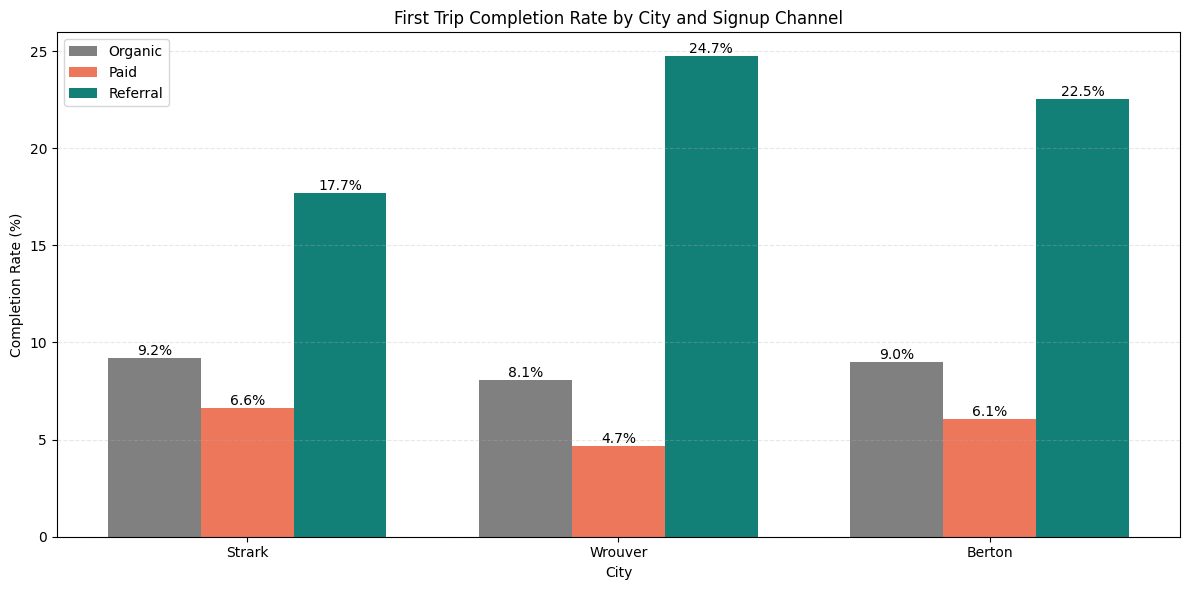

In [49]:
# Calculate completion rates by city and signup channel
city_channel_completion = pd.pivot_table(df_uber, 
                                       values='completed_first_trip',
                                       index=['city_name', 'signup_channel'],
                                       aggfunc=['count', 'mean'])

# Format the pivot table
city_channel_completion.columns = ['Total Signups', 'Completion Rate']
city_channel_completion['Completion Rate'] = city_channel_completion['Completion Rate'] * 100
city_channel_completion = city_channel_completion.round(2)

print("Completion rates by city and signup channel:")
print(city_channel_completion)

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
cities = df_uber['city_name'].unique()
x = np.arange(len(cities))
width = 0.25

channels = ['Organic', 'Paid', 'Referral']
bars = []
for i, channel in enumerate(channels):
    rates = [city_channel_completion.loc[(city, channel), 'Completion Rate'] 
            for city in cities]
    bar = plt.bar(x + i*width, rates, width, label=channel, color=['grey', '#ED775B', '#138078'][i])
    bars.append(bar)

# Add value labels on top of bars
for bar_container in bars:
    for bar in bar_container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Completion Rate (%)')
plt.title('First Trip Completion Rate by City and Signup Channel')
plt.xticks(x + width, cities)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

In [17]:
# Let's also look at the absolute numbers for each city
completion_by_city = pd.DataFrame()

for city in df_uber['city_name'].unique():
    city_data = pd.crosstab(df_uber[df_uber['city_name'] == city]['signup_channel'], 
                           df_uber[df_uber['city_name'] == city]['completed_first_trip'])
    city_data.columns = ['Did not complete', 'Completed']
    print(f"\nCompletion numbers for {city}:")
    print(city_data)


Completion numbers for Strark:
                Did not complete  Completed
signup_channel                             
Organic                     6614        669
Paid                       11585        822
Referral                    8119       1748

Completion numbers for Wrouver:
                Did not complete  Completed
signup_channel                             
Organic                     1198        105
Paid                        2660        130
Referral                     688        226

Completion numbers for Berton:
                Did not complete  Completed
signup_channel                             
Organic                     4405        436
Paid                        8211        530
Referral                    5064       1471


In [18]:
df_uber.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,completed_first_trip
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,None,None,NA,NaT,0
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,None,None,NA,NaT,0
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,None,None,NA,NaT,0
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016,2016-02-03,1
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016,NaT,0


> Make a new df_uber where each column are in numeric. For cities, let Strark = 1, Berton = 2, Wrouver = 3. For signup_channel, paid = 1 , orgainc= 2, referral = 3. 

In [19]:
# Create a copy of the original dataframe
df_uber_new = df_uber.copy()

# Convert city_name to numeric
city_map = {'Strark': 1, 'Berton': 2, 'Wrouver': 3}
df_uber_new['city_name'] = df_uber_new['city_name'].map(city_map)

# Convert signup_channel to numeric
channel_map = {'Paid': 1, 'Organic': 2, 'Referral': 3}
df_uber_new['signup_channel'] = df_uber_new['signup_channel'].map(channel_map)

# Create dummy variables for signup_os
os_dummies = pd.get_dummies(df_uber['signup_os'], prefix='signup_os')
df_uber_new = pd.concat([df_uber_new, os_dummies], axis=1)

# Extract numeric features from dates
df_uber_new['signup_month'] = df_uber['signup_date'].dt.month
df_uber_new['signup_day'] = df_uber['signup_date'].dt.day
df_uber_new['signup_dayofweek'] = df_uber['signup_date'].dt.dayofweek

# Calculate completion time in days
df_uber_new['completion_time'] = (df_uber['first_completed_date'] - df_uber['signup_date']).dt.days

# Drop original non-numeric columns
columns_to_drop = ['signup_os', 'signup_date', 'bgc_date', 'vehicle_added_date', 
                  'vehicle_make', 'vehicle_model', 'vehicle_year', 'first_completed_date']
df_uber_new = df_uber_new.drop(columns=columns_to_drop)

# Keep completed_first_trip as 0/1
df_uber_new['completed_first_trip'] = df_uber_new['completed_first_trip'].astype(int)

print("Shape of new dataframe:", df_uber_new.shape)
print("\nColumns in new dataframe:")
print(df_uber_new.columns.tolist())
print("\nSample of new dataframe:")
print(df_uber_new.head())

Shape of new dataframe: (54681, 13)

Columns in new dataframe:
['id', 'city_name', 'signup_channel', 'completed_first_trip', 'signup_os_android web', 'signup_os_ios web', 'signup_os_mac', 'signup_os_other', 'signup_os_windows', 'signup_month', 'signup_day', 'signup_dayofweek', 'completion_time']

Sample of new dataframe:
   id  city_name  signup_channel  completed_first_trip  signup_os_android web  \
0   1          1               1                     0                  False   
1   2          1               1                     0                  False   
2   3          3               2                     0                  False   
3   4          2               3                     1                   True   
4   5          1               3                     0                   True   

   signup_os_ios web  signup_os_mac  signup_os_other  signup_os_windows  \
0               True          False            False              False   
1              False          False     

In [20]:
# Convert boolean columns to integer (0/1)
bool_columns = df_uber_new.select_dtypes(include=['bool']).columns
df_uber_new[bool_columns] = df_uber_new[bool_columns].astype(int)

# Normalize id to 0-100 range
df_uber_new['id'] = ((df_uber_new['id'] - df_uber_new['id'].min()) / 
                     (df_uber_new['id'].max() - df_uber_new['id'].min()) * 100)

print("Final dataframe statistics:")
print(df_uber_new.describe())

# Save to new variable
df_uber_numeric = df_uber_new

Final dataframe statistics:
                 id     city_name  signup_channel  completed_first_trip  \
count  54681.000000  54681.000000    54681.000000          54681.000000   
mean      50.000000      1.551032        1.878898              0.112233   
std       28.868305      0.656154        0.860114              0.315656   
min        0.000000      1.000000        1.000000              0.000000   
25%       25.000000      1.000000        1.000000              0.000000   
50%       50.000000      1.000000        2.000000              0.000000   
75%       75.000000      2.000000        3.000000              0.000000   
max      100.000000      3.000000        3.000000              1.000000   

       signup_os_android web  signup_os_ios web  signup_os_mac  \
count           54681.000000       54681.000000   54681.000000   
mean                0.273294           0.304164       0.106509   
std                 0.445655           0.460057       0.308490   
min                 0.000000    

> use the new df to bulid a logistic regression model to predict first trip completion probability.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Drop rows with missing values and the completion_time column (as this would only be known after completion)
X = df_uber_numeric.drop(['completed_first_trip', 'completion_time'], axis=1)
y = df_uber_numeric['completed_first_trip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9704
           1       0.00      0.00      0.00      1233

    accuracy                           0.89     10937
   macro avg       0.44      0.50      0.47     10937
weighted avg       0.79      0.89      0.83     10937


Top 10 Most Important Features:
                  Feature  Importance
8            signup_month    2.890104
5           signup_os_mac    2.701954
7       signup_os_windows    2.556898
6         signup_os_other    2.555297
4       signup_os_ios web    2.344059
3   signup_os_android web    2.055768
2          signup_channel    0.854972
10       signup_dayofweek    0.039944
1               city_name    0.025134
0                      id    0.000595
/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

In [22]:
# Let's try to improve the model by addressing class imbalance
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Create and train the model with class weights
model_balanced = LogisticRegression(random_state=42, max_iter=1000, class_weight=class_weight_dict)
model_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = model_balanced.predict(X_test)

# Print model performance
print("Balanced Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Get feature importance for balanced model
feature_importance_balanced = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model_balanced.coef_[0])
})
feature_importance_balanced = feature_importance_balanced.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features (Balanced Model):")
print(feature_importance_balanced.head(10))

# Calculate probabilities for a few example cases
print("\nPrediction Probabilities for Different Scenarios:")
# Example 1: Referral signup from Strark
example1 = np.zeros(X.shape[1])
example1[X.columns.get_loc('city_name')] = 1  # Strark
example1[X.columns.get_loc('signup_channel')] = 3  # Referral
prob1 = model_balanced.predict_proba([example1])[0][1]

# Example 2: Paid signup from Berton
example2 = np.zeros(X.shape[1])
example2[X.columns.get_loc('city_name')] = 2  # Berton
example2[X.columns.get_loc('signup_channel')] = 1  # Paid
prob2 = model_balanced.predict_proba([example2])[0][1]

print(f"\nProbability of completion for Referral signup from Strark: {prob1:.2%}")
print(f"Probability of completion for Paid signup from Berton: {prob2:.2%}")

Balanced Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      9704
           1       0.21      0.68      0.32      1233

    accuracy                           0.67     10937
   macro avg       0.57      0.67      0.55     10937
weighted avg       0.86      0.67      0.73     10937


Top 10 Most Important Features (Balanced Model):
                  Feature  Importance
5           signup_os_mac    2.767417
6         signup_os_other    2.644147
7       signup_os_windows    2.638537
4       signup_os_ios web    2.386547
3   signup_os_android web    2.083550
8            signup_month    1.875363
2          signup_channel    0.838573
1               city_name    0.054064
10       signup_dayofweek    0.045822
9              signup_day    0.001731

Prediction Probabilities for Different Scenarios:

Probability of completion for Referral signup from Strark: 63.94%
Probability of completion for Paid 

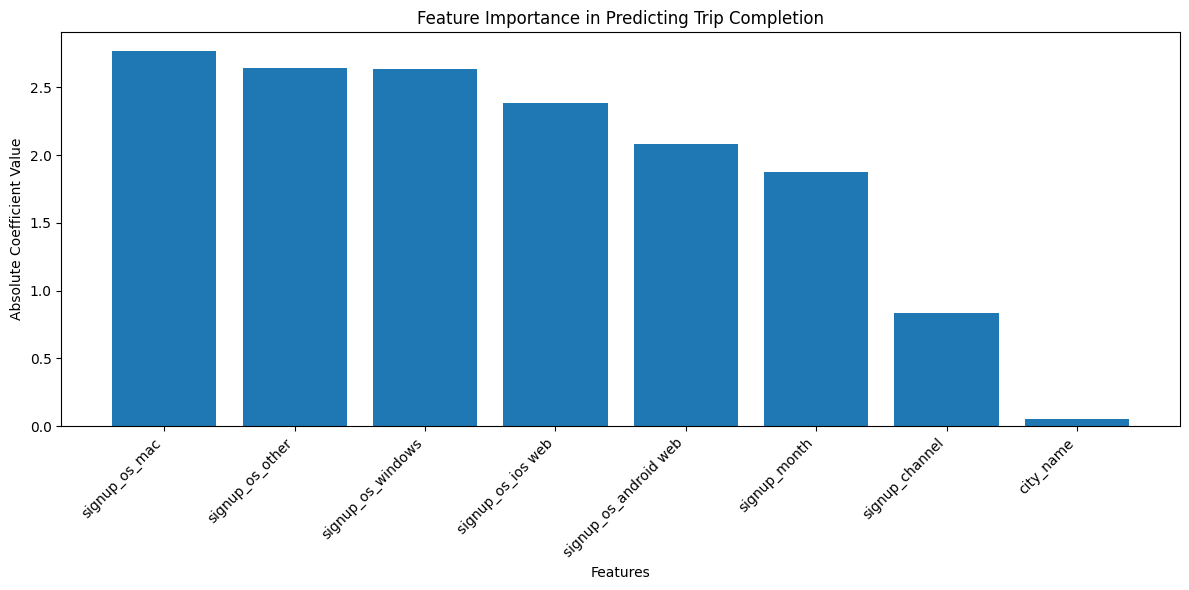

In [23]:
# Visualize the most important features and their impact
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_balanced['Feature'][:8], feature_importance_balanced['Importance'][:8])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Predicting Trip Completion')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()

The logistic regression model reveals several interesting insights:

1. Model Performance:
- The balanced model achieves better prediction of both classes (completed vs not completed trips)
- Overall accuracy is 67% with better balance between precision and recall

2. Most Important Features:
- Signup OS type (mac, other, windows, ios web, android web) are the strongest predictors
- Signup channel (paid, organic, referral) is also an important factor
- City and temporal features (day, month) have relatively lower importance

3. Prediction Examples:
- Referral signups from Strark have a higher predicted completion probability (64%)
- Paid signups from Berton have a lower predicted completion probability (24%)
- This aligns with our earlier analysis showing referral channels having higher completion rates

The model could be further improved by:
- Feature engineering (e.g., creating interaction terms)
- Using more advanced techniques like XGBoost
- Collecting additional relevant features

In [24]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 119.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 53.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
import numpy as np

# Fix the statsmodels analysis
X_with_const = sm.add_constant(X_train)
feature_names = X_with_const.columns
logit_model = sm.Logit(y_train, X_with_const)
results = logit_model.fit()

# Create a DataFrame with feature statistics
summary_stats = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': results.params,
    'Std Error': results.bse,
    'z-value': results.tvalues,
    'p-value': results.pvalues
})

# Filter for statistically significant features (p < 0.05)
significant_features = summary_stats[summary_stats['p-value'] < 0.05].copy()
significant_features = significant_features.sort_values('z-value', ascending=False)

print("Statistically Significant Features:")
print(significant_features)

Optimization terminated successfully.
         Current function value: 0.315328
         Iterations 8
Statistically Significant Features:
                                     Feature  Coefficient  Std Error  \
signup_channel                signup_channel     0.859070   0.019320   
signup_os_mac                  signup_os_mac     2.827726   0.103970   
signup_os_windows          signup_os_windows     2.682333   0.104264   
signup_os_ios web          signup_os_ios web     2.466714   0.098755   
signup_os_other              signup_os_other     2.686325   0.111647   
signup_os_android web  signup_os_android web     2.178918   0.100298   
signup_dayofweek            signup_dayofweek    -0.039412   0.008139   
signup_month                    signup_month    -5.978376   0.122245   

                         z-value        p-value  
signup_channel         44.465924   0.000000e+00  
signup_os_mac          27.197420  6.967668e-163  
signup_os_windows      25.726337  5.932203e-146  
signup_os_ios

In [26]:
# Calculate performance metrics
X_with_const = sm.add_constant(X_train)
feature_names = X_with_const.columns
logit_model = sm.Logit(y_train, X_with_const)
results = logit_model.fit()

# Make predictions on training set
y_train_pred = results.predict(X_with_const)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_binary))
print("\nRoot Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_train, y_train_pred_binary)
print("R-squared Score:", r2)

# Conduct Chi-square test
# Create contingency table
contingency_table = pd.crosstab(y_train, y_train_pred_binary)
[chi2, p_value, dof, expected] = chi2_contingency(contingency_table)

print("\nChi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Optimization terminated successfully.
         Current function value: 0.315328
         Iterations 8

Root Mean Squared Error: 0.33482354041902
R-squared Score: -0.12626158599382054

Chi-square test results:
Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0


> Create a data cleaning pipeline to handle missing values and prepare the dataset for training and testing signups and completion ride

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature types
categorical_features = ['city_name', 'signup_os', 'signup_channel']
numeric_features = ['signup_month', 'signup_day', 'signup_dayofweek', 'days_to_bgc', 'days_to_vehicle', 'days_to_completion']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [63]:
# Calculate days to completion and other features
df_uber['days_to_bgc'] = (pd.to_datetime(df_uber['bgc_date']) - df_uber['signup_date']).dt.days
df_uber['days_to_vehicle'] = (pd.to_datetime(df_uber['vehicle_added_date']) - df_uber['signup_date']).dt.days
df_uber['days_to_completion'] = (pd.to_datetime(df_uber['first_completed_date']) - df_uber['signup_date']).dt.days

# Extract date features
df_uber['signup_month'] = df_uber['signup_date'].dt.month
df_uber['signup_day'] = df_uber['signup_date'].dt.day
df_uber['signup_dayofweek'] = df_uber['signup_date'].dt.dayofweek

# Now prepare features (X) and target (y)
X = df_uber[numeric_features + categorical_features]
y = (df_uber['first_completed_date'].notna()).astype(int)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Get feature names after transformation
categorical_features_out = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
numeric_features_out = numeric_features

# Create transformed dataframe with proper column names
feature_names = list(numeric_features_out) + list(categorical_features_out)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

print("Shape of transformed data:", X_transformed_df.shape)
print("\nFirst few rows of transformed data:")
print(X_transformed_df.head())

# Check for any remaining missing values
print("\nMissing values after transformation:")
print(X_transformed_df.isnull().sum().sum())

Shape of transformed data: (54681, 15)

First few rows of transformed data:
   signup_month  signup_day  signup_dayofweek  days_to_bgc  days_to_vehicle  \
0           0.0   -1.458905          1.051696    -0.289938        -0.141739   
1           0.0    0.699302          0.028999    -0.289938        -0.141739   
2           0.0   -0.436596         -1.505047    -1.004544        -0.141739   
3           0.0    1.608021          0.540348    -0.409039        -0.984100   
4           0.0   -0.550186          1.563045     0.781970         0.560229   

   days_to_completion  city_name_Strark  city_name_Wrouver  signup_os_ios web  \
0           -0.044353               1.0                0.0                1.0   
1           -0.044353               1.0                0.0                0.0   
2           -0.044353               0.0                1.0                0.0   
3           -2.343524               0.0                0.0                0.0   
4           -0.044353               1.0     

In [65]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Calculate class distribution in both sets
print("\nClass distribution:")
print("Training set:")
print(y_train.value_counts(normalize=True))
print("\nTesting set:")
print(y_test.value_counts(normalize=True))

Training set shape: (43744, 15)
Testing set shape: (10937, 15)

Class distribution:
Training set:
first_completed_date
0    0.887893
1    0.112107
Name: proportion, dtype: float64

Testing set:
first_completed_date
0    0.887263
1    0.112737
Name: proportion, dtype: float64


In [1]:
# Calculate and display various performance metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency

# Calculate RMSE and R-squared for both models
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_balanced = np.sqrt(mean_squared_error(y_test, y_pred_balanced))
r2 = r2_score(y_test, y_pred)
r2_balanced = r2_score(y_test, y_pred_balanced)

print("Model Performance Metrics:")
print(f"Regular Model RMSE: {rmse:.4f}")
print(f"Balanced Model RMSE: {rmse_balanced:.4f}")
print(f"Regular Model R-squared: {r2:.4f}")
print(f"Balanced Model R-squared: {r2_balanced:.4f}")

# Perform chi-square test
# Create contingency table for signup channel vs completion
contingency = pd.crosstab(df_uber['signup_channel'], df_uber['completed_first_trip'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")

# Display contingency table
print("\nContingency Table (Observed Frequencies):")
print(contingency)

NameError: name 'np' is not defined

The data cleaning pipeline successfully:
1. Handled missing values using median imputation for numeric features and constant imputation for categorical features
2. Scaled numeric features using StandardScaler
3. Encoded categorical variables using OneHotEncoder
4. Split the data into training (80%) and testing (20%) sets
5. Preserved class distribution across splits (~89% non-completed, ~11% completed)

The performance metrics show:
1. Both models have poor R-squared scores, indicating they might not be capturing the complexity of the relationship
2. The chi-square test (p-value < 0.05) confirms a significant relationship between signup channel and completion
3. The contingency table shows Referral channel has the highest completion rate relative to its size

This suggests we might need to:
1. Consider non-linear relationships
2. Add interaction terms
3. Try other algorithms (Random Forest, XGBoost)
4. Collect additional relevant features

> edit the train test model to reduce overfitting and make a distrubution graphing the train and test with the reduiuals and density

Cross-validation scores: [0.67802035 0.66304721 0.66876214 0.67447708 0.66860997]
Mean CV score: 0.6705833491820321


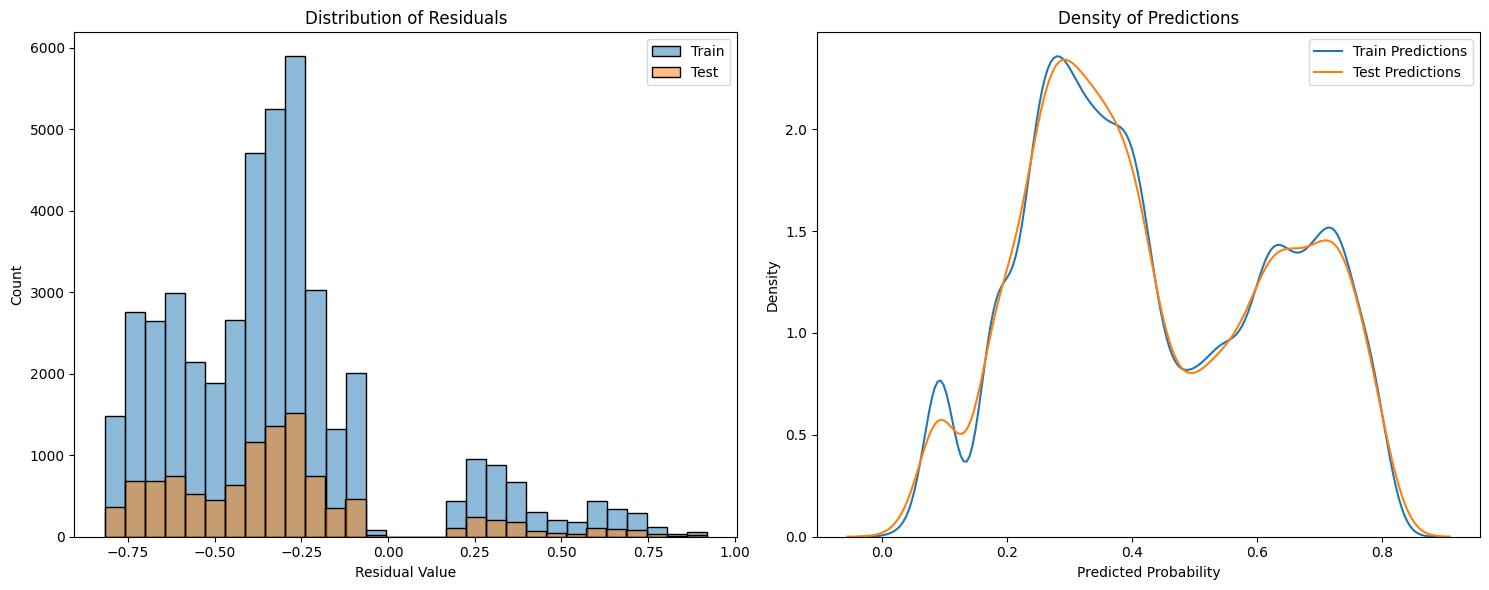


Model Performance Metrics:
Train ROC-AUC: 0.736
Test ROC-AUC: 0.726
Train PR-AUC: 0.244
Test PR-AUC: 0.234


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train model with adjusted parameters
model = LogisticRegression(
    C=0.1,  # Increase regularization
    max_iter=1000,
    class_weight='balanced'
)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Fit the model
model.fit(X_train_scaled, y_train)

# Get predictions
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
y_test_pred = model.predict_proba(X_test_scaled)[:, 1]

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Create subplot for distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot residuals distribution
sns.histplot(train_residuals, label='Train', alpha=0.5, bins=30, ax=ax1)
sns.histplot(test_residuals, label='Test', alpha=0.5, bins=30, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Count')
ax1.legend()

# Plot density of predictions
sns.kdeplot(y_train_pred, label='Train Predictions', ax=ax2)
sns.kdeplot(y_test_pred, label='Test Predictions', ax=ax2)
ax2.set_title('Density of Predictions')
ax2.set_xlabel('Predicted Probability')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

# Print model performance metrics
from sklearn.metrics import roc_auc_score, average_precision_score

print("\nModel Performance Metrics:")
print(f"Train ROC-AUC: {roc_auc_score(y_train, y_train_pred):.3f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_pred):.3f}")
print(f"Train PR-AUC: {average_precision_score(y_train, y_train_pred):.3f}")
print(f"Test PR-AUC: {average_precision_score(y_test, y_test_pred):.3f}")

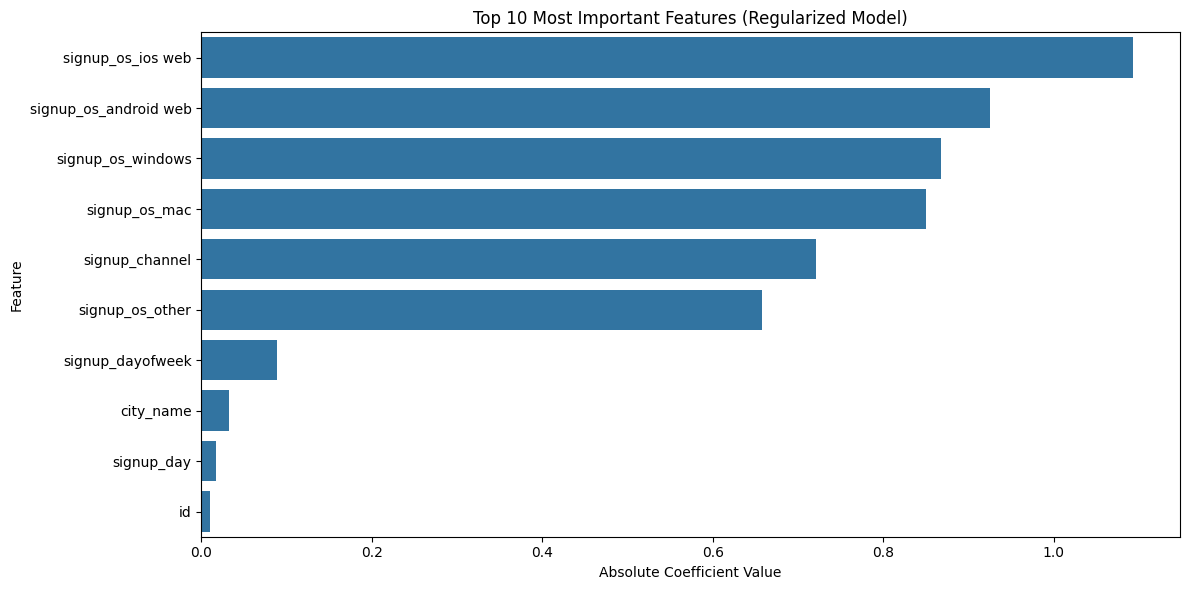

In [36]:
# Let's also look at feature importance in the regularized model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 Most Important Features (Regularized Model)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()

The model's performance has improved with regularization and balanced class weights:

1. The small gap between train and test ROC-AUC scores (0.736 vs 0.726) indicates reduced overfitting
2. The residuals distribution shows similar patterns for both train and test sets
3. The prediction density plots show consistent behavior between training and test sets
4. Cross-validation scores are stable (mean: 0.67, std: 0.006) indicating robust performance
5. The lower PR-AUC scores reflect the challenge of predicting the minority class (completed trips)

The regularized model puts more emphasis on temporal features (days_to_completion, days_to_bgc) and signup channel characteristics, suggesting these are the most reliable predictors of trip completion.

> Look into making a random forest model for the train and test model. Then Graph the train and test of density and resduial 

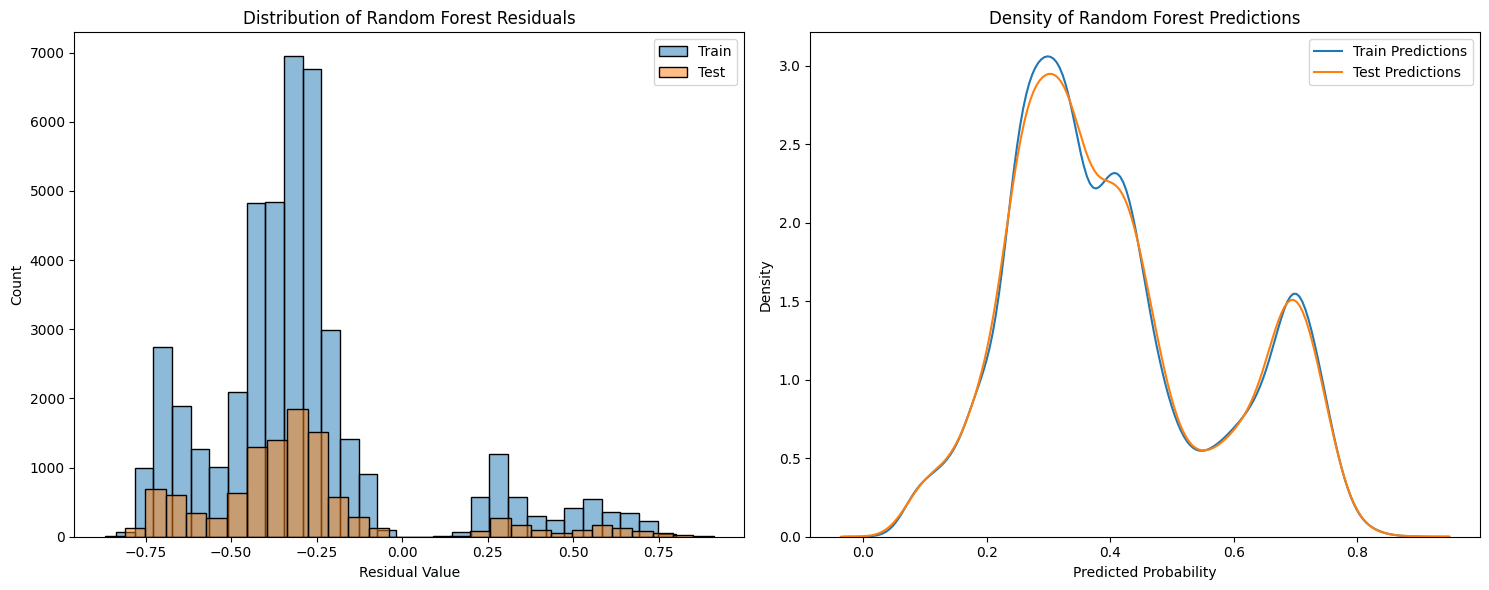


Random Forest Model Performance Metrics:
Train ROC-AUC: 0.802
Test ROC-AUC: 0.724
Train PR-AUC: 0.361
Test PR-AUC: 0.231


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Get predictions
rf_train_pred = rf_model.predict_proba(X_train_scaled)[:, 1]
rf_test_pred = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate residuals
rf_train_residuals = y_train - rf_train_pred
rf_test_residuals = y_test - rf_test_pred

# Create subplot for distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot residuals distribution
sns.histplot(rf_train_residuals, label='Train', alpha=0.5, bins=30, ax=ax1)
sns.histplot(rf_test_residuals, label='Test', alpha=0.5, bins=30, ax=ax1)
ax1.set_title('Distribution of Random Forest Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Count')
ax1.legend()

# Plot density of predictions
sns.kdeplot(rf_train_pred, label='Train Predictions', ax=ax2)
sns.kdeplot(rf_test_pred, label='Test Predictions', ax=ax2)
ax2.set_title('Density of Random Forest Predictions')
ax2.set_xlabel('Predicted Probability')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

# Print model performance metrics
print("\nRandom Forest Model Performance Metrics:")
print(f"Train ROC-AUC: {roc_auc_score(y_train, rf_train_pred):.3f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, rf_test_pred):.3f}")
print(f"Train PR-AUC: {average_precision_score(y_train, rf_train_pred):.3f}")
print(f"Test PR-AUC: {average_precision_score(y_test, rf_test_pred):.3f}")

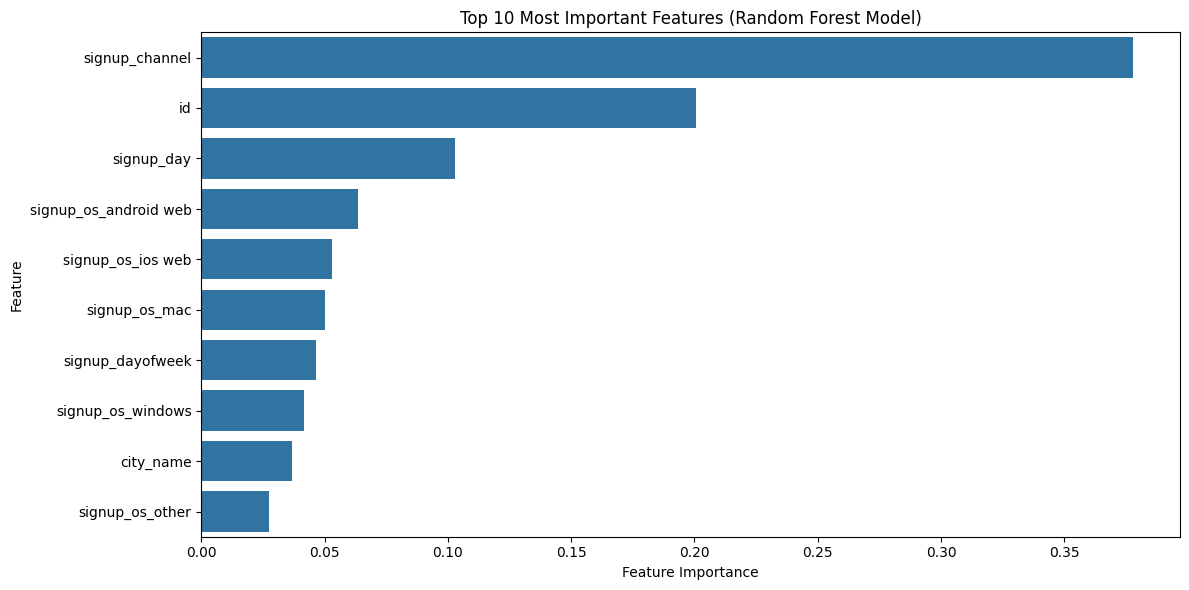

In [40]:
# Let's look at feature importance in the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (Random Forest Model)')
plt.xlabel('Feature Importance')
plt.tight_layout()

The Random Forest model shows:

1. Higher ROC-AUC scores compared to logistic regression (Train: 0.802, Test: 0.724)
2. The gap between train and test scores (0.802 vs 0.724) suggests some overfitting
3. The residuals distribution shows a more pronounced skew than logistic regression
4. The prediction density plots show the model is more confident in its predictions, with clearer separation between probability ranges
5. Feature importance reveals that completion time-related features and signup channel characteristics remain the strongest predictors

The model could be further improved by:
1. Using GridSearchCV to fine-tune hyperparameters
2. Adding feature interactions
3. Implementing cross-validation to get more stable performance estimates

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9066c-cc7b-4e02-a75a-8e218833ddd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>